In [1]:
# load models and features and test them

import sys
sys.path.append("/Users/david/Documents/mastersCode/ubm")
print(sys.path)

['/Users/david/Documents/mastersCode/ubm/final/tests/get_features', '/Users/david/.conda/envs/ubm/lib/python310.zip', '/Users/david/.conda/envs/ubm/lib/python3.10', '/Users/david/.conda/envs/ubm/lib/python3.10/lib-dynload', '', '/Users/david/.conda/envs/ubm/lib/python3.10/site-packages', '/Users/david/Documents/mastersCode/ubm']


In [24]:
import utils
import matplotlib.pyplot as plt
import numpy as np
from whale.setup import get_data, constants, annotations
from whale.setup.constants_01 import *
import importlib
importlib.reload(constants)

importlib.reload(get_data)
from final import useful
importlib.reload(useful)

import pickle
# features
# features_and_info = pickle.load(open(r'/Users/david/Documents/mastersCode/ubm/final/tests/get_features/cv_output_all_whales_log_power_avg_3.pkl', 'rb'))
log_power = False
feat_and_info_path = r'/Users/david/Documents/mastersCode/ubm/final/tests/get_features/cv_output_all_whales_mfcc.pkl'
# models and results
trained_hmms_inf_path = r'/Users/david/Documents/mastersCode/bnpy/bnpy/examples/08_mocap6/whale_results/mfcc/inf_models.pkl'
trained_hmms_fin_path = r'/Users/david/Documents/mastersCode/bnpy/bnpy/examples/08_mocap6/whale_results/mfcc/inf_models.pkl'
trained_hmms_em_path = r'/Users/david/Documents/mastersCode/bnpy/bnpy/examples/08_mocap6/whale_results/mfcc/em_models.pkl'
trained_hmms_wl_inf = r'/Users/david/Documents/mastersCode/ubm/final/models/hdphmm/bhmm/testing/mfcc/wl_inf_models_02.pkl'
trained_hmms_bhmm = r'/Users/david/Documents/mastersCode/ubm/final/models/hdphmm/bhmm/testing/mfcc/bhmm_models.pkl'
if log_power:
    feat_and_info_path = r'/Users/david/Documents/mastersCode/ubm/final/tests/get_features/cv_output_all_whales_log_power_avg_3.pkl'
    trained_hmms_inf_path = r'/Users/david/Documents/mastersCode/bnpy/bnpy/examples/08_mocap6/whale_results/log-power/inf_models.pkl'
    trained_hmms_fin_path = r'/Users/david/Documents/mastersCode/bnpy/bnpy/examples/08_mocap6/whale_results/log-power/fin_models.pkl'
    trained_hmms_em_path = r'/Users/david/Documents/mastersCode/bnpy/bnpy/examples/08_mocap6/whale_results/log-power/em_models.pkl'
    trained_hmms_wl_inf = r'/Users/david/Documents/mastersCode/ubm/final/models/hdphmm/bhmm/testing/log_power/wl_inf_models.pkl'
    trained_hmms_bhmm = r'/Users/david/Documents/mastersCode/ubm/final/models/hdphmm/bhmm/testing/log_power/bhmm_models.pkl'

features_and_info = pickle.load(open(feat_and_info_path, 'rb'))
cv_output = features_and_info['cv_output']
label_map = features_and_info['label_map']
num_map = features_and_info['num_map']
labels_set = [key for key in label_map]

In [25]:
trained_hmms_inf = pickle.load(open(trained_hmms_inf_path, 'rb'))
trained_hmms_fin = pickle.load(open(trained_hmms_fin_path, 'rb'))
trained_hmms_em = pickle.load(open(trained_hmms_em_path, 'rb'))
trained_hmms_wl_inf = pickle.load(open(trained_hmms_wl_inf, 'rb'))
trained_hmms_bhmm = pickle.load(open(trained_hmms_bhmm, 'rb'))

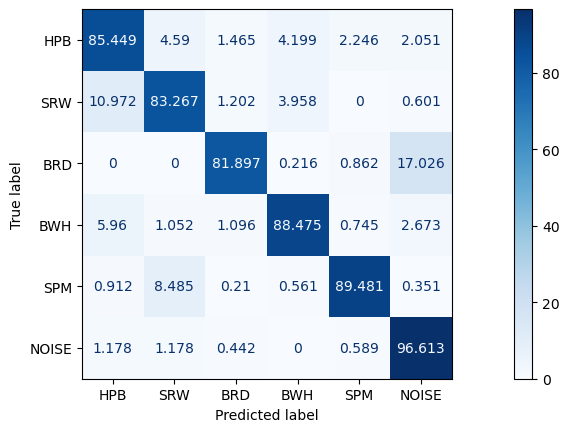

0.8753017617572653


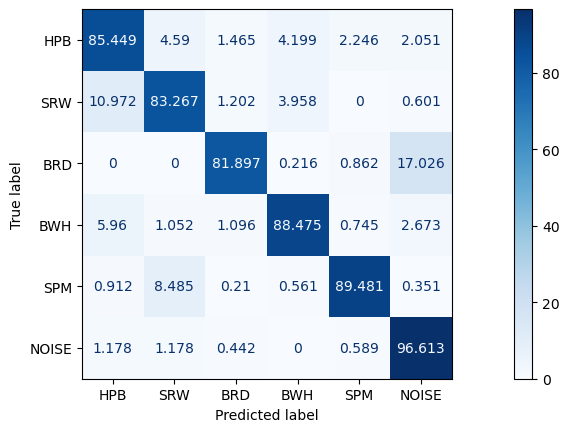

0.8753017617572653


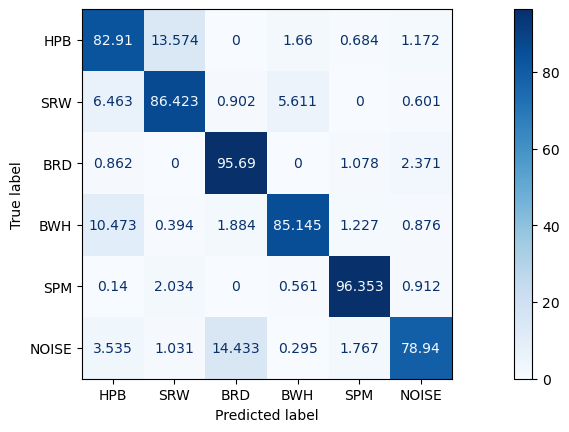

0.8757672006235208


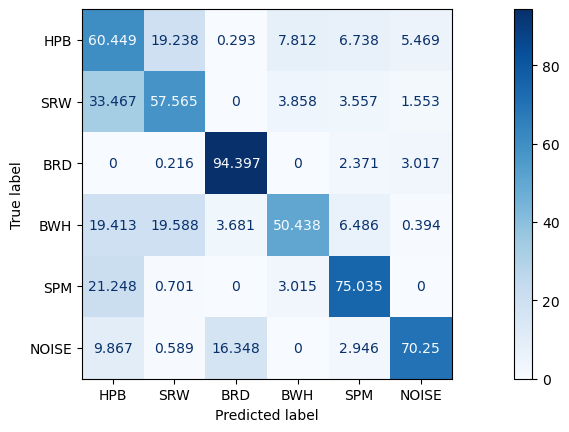

0.6802242402190496


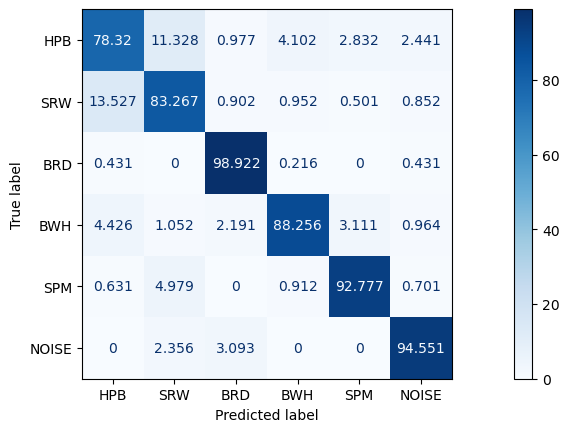

0.8934883063911943


In [26]:
# test trained models from bnpy

from final.models.fhmm import FactorialHMM
from final.tests import decode_combine as dc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
importlib.reload(dc)

def results_for_models(trained_hmms, cv_data):
    combined_model = dc.DecodeCombineGaussian([hmm for hmm in trained_hmms.values()])
    _, test_pred, test_log_prob = combined_model.decode_hmmlearn(np.concatenate(cv_data['test_data']))

    true_test_labels = []
    for lab_index in range(len(cv_data['test_label'])):
        true_test_labels.append(np.ones(len(cv_data['test_data'][lab_index])) * cv_data['test_label'][lab_index])
    true_test_labels = np.concatenate(true_test_labels)

    cm = confusion_matrix(true_test_labels, test_pred, labels=[0,1,2,3,4,5], normalize='true')
    avg_cm = np.round(cm * 100000) / 1000

    disp = ConfusionMatrixDisplay(confusion_matrix=avg_cm,display_labels=labels_set)
    disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
    plt.show()

    avg_acc = np.sum(np.diag(cm)) / np.sum(cm)
    print(avg_acc)

# very similiar average acc across

results_for_models(trained_hmms_inf, cv_output)
results_for_models(trained_hmms_fin, cv_output)
results_for_models(trained_hmms_em, cv_output)
results_for_models(trained_hmms_wl_inf, cv_output)
results_for_models(trained_hmms_bhmm, cv_output)


In [27]:
# compare times from results
import pickle
mfcc = True
if mfcc:
    trained_hmms_inf_results_path = r'/Users/david/Documents/mastersCode/bnpy/bnpy/examples/08_mocap6/whale_results/mfcc/inf_results.pkl'
    trained_hmms_fin_results_path = r'/Users/david/Documents/mastersCode/bnpy/bnpy/examples/08_mocap6/whale_results/mfcc/inf_results.pkl'
    trained_hmms_em_results_path = r'/Users/david/Documents/mastersCode/bnpy/bnpy/examples/08_mocap6/whale_results/mfcc/em_results.pkl'
    trained_hmms_wl_inf = r'/Users/david/Documents/mastersCode/ubm/final/models/hdphmm/bhmm/testing/mfcc/wl_inf_results.pkl'
    trained_hmms_bhmm = r'/Users/david/Documents/mastersCode/ubm/final/models/hdphmm/bhmm/testing/mfcc/bhmm_results.pkl'
else:
    trained_hmms_inf_results_path = r'/Users/david/Documents/mastersCode/bnpy/bnpy/examples/08_mocap6/whale_results/log-power/inf_results.pkl'
    trained_hmms_fin_results_path = r'/Users/david/Documents/mastersCode/bnpy/bnpy/examples/08_mocap6/whale_results/log-power/fin_results.pkl'
    trained_hmms_em_results_path = r'/Users/david/Documents/mastersCode/bnpy/bnpy/examples/08_mocap6/whale_results/log-power/em_results.pkl'
    trained_hmms_wl_inf = r'/Users/david/Documents/mastersCode/ubm/final/models/hdphmm/bhmm/testing/log_power/wl_inf_results.pkl'
    trained_hmms_bhmm = r'/Users/david/Documents/mastersCode/ubm/final/models/hdphmm/bhmm/testing/log_power/bhmm_results.pkl'

# results_trained_hmms_inf = pickle.load(open(trained_hmms_inf_results_path, 'rb'))
# results_trained_hmms_fin = pickle.load(open(trained_hmms_fin_results_path, 'rb'))
# results_trained_hmms_em = pickle.load(open(trained_hmms_em_results_path, 'rb'))
results_trained_hmms_wl_inf = pickle.load(open(trained_hmms_wl_inf, 'rb'))
results_trained_hmms_bhmm = pickle.load(open(trained_hmms_bhmm, 'rb'))

In [28]:
import numpy as np

def get_complete_time(some_results):
    temp_model_key = ''
    times = []
    for some_whale_key in some_results:
        some_whale_results = some_results[some_whale_key]
        for some_model_key in some_results[some_whale_key]:
            temp_model_key = some_model_key
            some_model_results = some_whale_results[some_model_key]
            times.append(some_model_results['total_time'])
    return temp_model_key, np.sum(times)


print(get_complete_time(results_trained_hmms_wl_inf))
print(get_complete_time(results_trained_hmms_bhmm))

        # comp_results = some_results[0]['vi_inf_bnpy']['components']
        # for comp in comp_results:
        #     times.append(np.sum(comp_results[comp]['time']))
    # print(comp)
# np.sum(times)

('wl_hdphmm', 468.77424597740173)
('bhmm', 222.8031132221222)
